In [ ]:
# Honey Bee Hive model
# Justin Salamon

In [9]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# initial conditions

# number of days simulation is run
days = 365

# Egg laying rate of queen
E_0 = 1500.0

# Hive capacity
hive_capacity = 60000.0

# initial population factor - multiplied by hive capacity to give us a starting point
# can be changed along with hive capacity.
init_factor = 0.1

# Initial Population
initial_pop = init_factor*hive_capacity

# Initial phase values
# each of these are multiplied by initial population to give a good setup of 
# population spread - these factors must add up 1.0
# values obtained from table 4

#initial eggs factor
init_eggs = 0.05
#initial Larvae factor
init_larvae = 0.10
#initial Pupae factor
init_pupae = 0.21
#initial hive bees factor
init_hivebees = 0.44
#initial forager bees factor
init_foragerbees = 0.20

# Time spent in phase values obtained from table 2
# days spent as an egg
days_in_egg = 3
# days spent as a larva
days_as_larvae = 5
# days spent as a pupae
days_as_pupae = 12
# lifespan of hive bees
hive_bee_span = 21
# lifespan of forager bees
forager_bee_span= 14

# Survival value obtained from table 3 - can be changed during simulation when season changes
# or as a result of infection.
# Egg survival rate
S_egg = 0.97
#Larvae survival rate
S_larvae = 0.99
# Pupae survival rate
S_pupae = 0.999
# Hive bee survival rate
S_hivebee = 0.985
# Forager bee survival rate
S_forager = 0.955

# Consumption rates for each phase - measured in grams/(bee*day)
# obtained from Table 6
# egg consumption
C_egg = 0
# larvae consumption
C_larvae = 0.018
# pupae consumption
C_pupae = 0
# hive bee consumption
C_hive = 0.007
# forager bee consumption
C_forager = 0.007

# Forager food acquisition rate - nectar and pollen 
# can be influenced by seasonal changes or by illness.
food_per_day = 0.1 # gram/(bee*day)

In [20]:
# Eggs per day
Eggs = np.zeros(days)
Eggs[0] = init_eggs*initial_pop
# eggs will last 3 days, so they belong in egg_life
egg_life = np.zeros(days_in_egg)
egg_life[0] = Eggs[0]

      
# Larva per day
Larvae = np.zeros(days)
Larvae[0] = init_larvae*initial_pop
# where the current larvae are living, days_as_larvae slots
larvae_life = np.zeros(days_as_larvae)
larvae_life[0] = Larvae[0]

# Pupae
Pupae = np.zeros(days)
Pupae[0] = init_pupae*initial_pop
# where the pupae live
pupae_life = np.zeros(days_as_pupae)
pupae_life[0] = Pupae[0]

# Hive Bees
Hive_Bees = np.zeros(days)
Hive_Bees[0] = init_hivebees*initial_pop
# where the hive bees live
hive_bee_life = np.zeros(hive_bee_span)
hive_bee_life[0] = Hive_Bees[0]

# Forager Bees
Forager_Bees = np.zeros(days)
Forager_Bees[0] = init_foragerbees*initial_pop
#where the forager bees live
forager_bee_life = np.zeros(forager_bee_span)
forager_bee_life[0] = Forager_Bees[0]

# Food storage
Food = np.zeros(days)
init_food_factor = 2.0
Food[0] = init_food_factor

print("Hive Capacity:",hive_capacity)
print("Initial Population:", initial_pop)
print("Initial Eggs:",Eggs[0])
print("Initial Larvae:",Larvae[0])
print("Initial Pupae:", Pupae[0])
print("Initial Hive Bees", Hive_Bees[0])
print("Initial Forager Bees:", Forager_Bees[0])

IndentationError: expected an indented block after 'for' statement on line 7 (2060695306.py, line 11)

In [21]:
#Hive bee to larvae ratio
Ratio_Hive_Larvae = Hive_Bees[0]/Larvae[0]
# What a healthy ration should be
Healthy_Ratio = 2
# alpha factor for reducing larvae survival based on ratio of hive bees to larvae
alpha = 0.25
# r is the ratio of the actual hive to larvae ratio and the healthy ratio
r = Ratio_Hive_Larvae/Healthy_Ratio
# Reduced Survival Rate of Larvae - occurs if the colony does not have enough hive bees to nurse the 
# larvae. In the case that the ratio of hive bees to larvae dips below the healthy ratio,
# then use this reduced survival rate, which will be less than 1.
S_reduced_larvae = S_larvae*(r**alpha)


print("Ratio of Hive Bees to Larvae:", Ratio_Hive_Larvae)
print("Healthy Ratio:", Healthy_Ratio)
print("Reduced Survival Rate:", S_reduced_larvae)

Ratio of Hive Bees to Larvae: 3.482142857142857
Healthy Ratio: 2
Reduced Survival Rate: 1.137206522052837


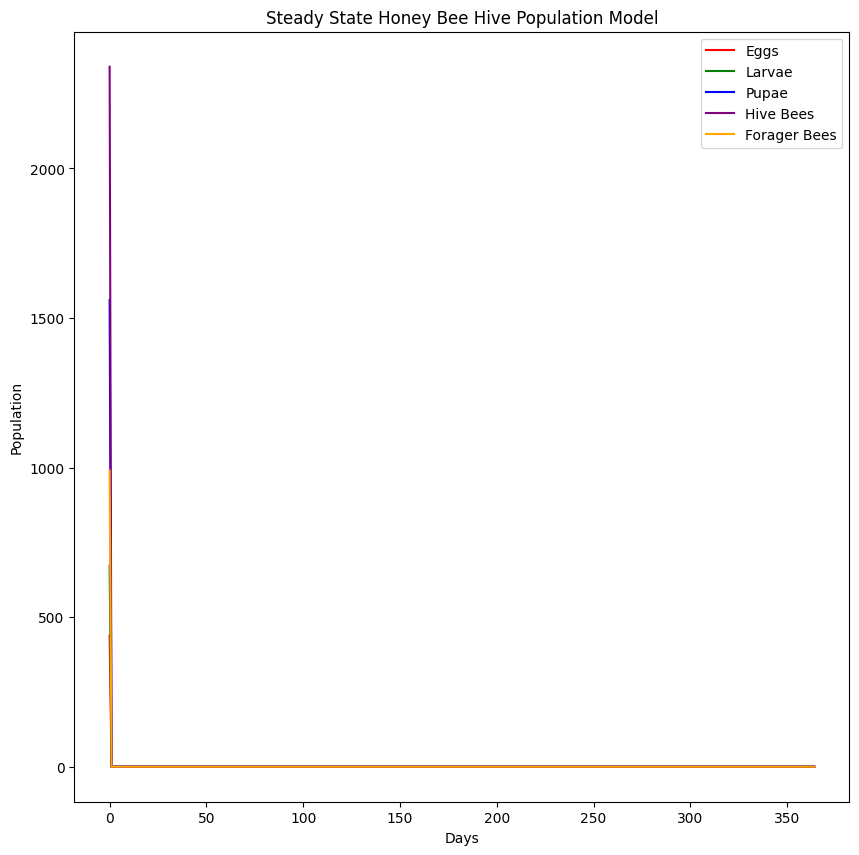

In [24]:
# plot population vs days
plt.figure(figsize=(10,10))
plt.title("Steady State Honey Bee Hive Population Model", fontsize="large")
plt.xlabel("Days",fontsize='medium')
plt.ylabel("Population", fontsize='medium')

plt.plot(Eggs,color='red',label="Eggs")
plt.plot(Larvae,color='green',label='Larvae')
plt.plot(Pupae,color='blue',label='Pupae')
plt.plot(Hive_Bees,color='purple',label='Hive Bees')
plt.plot(Forager_Bees,color='orange',label='Forager Bees')

plt.legend()
plt.show()